                                                                      Fake News Prediction                                                 

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#Fetching the data set

Fake_news_dataset=pd.read_csv("C:\\Users\\abhis\\Downloads\\train.csv.zip")

In [ ]:
# Printing the first five rows of the dataset

Fake_news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
# Size of the dataset

Fake_news_dataset.shape

(20800, 5)

In [ ]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence.

In [ ]:
#Checking for the NA value in the dataset

Fake_news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
# As we have a pretty big dataset we can ignore the NULL values
Fake_news_dataset=Fake_news_dataset.fillna('')

In [ ]:
Fake_news_dataset.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
# Shape of dataset

Fake_news_dataset.shape

(20800, 5)

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

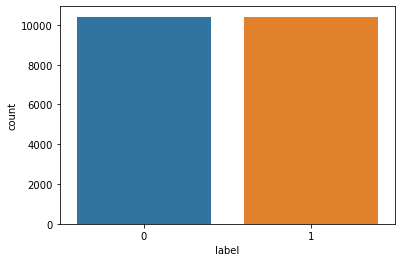

In [ ]:
# IN the above data set label is our end result which will give tell us 
# Is it a Fake news or Real News

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(Fake_news_dataset.label)


In [ ]:
Fake_news_dataset.label.value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [ ]:
# we have equal values of Fake and real news in our dataset

In [ ]:
# Concat the three categorical colums (independent column)

Fake_news_dataset['Content']=Fake_news_dataset['author']+' '+Fake_news_dataset['title']

In [ ]:
Fake_news_dataset['Content']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: Content, Length: 20800, dtype: object

In [ ]:
#Dropping title and author column as we have concatination

Fake_news_dataset=Fake_news_dataset.drop(['text','title','author'],axis=1)

In [ ]:
Fake_news_dataset.head()

,id,label,Content
0,0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,1,Consortiumnews.com Why the Truth Might Get You...
3,3,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,1,Howard Portnoy Iranian woman jailed for fictio...


In [ ]:
# Now we have our data dependent variable and independent variable 
# As 'Content' contains categorial values which are needed to be converted in numerical values

# In the above 'Content' column there is need to remove stopwords and need to convert words in their root form using 'stem'

In [ ]:
ps=PorterStemmer()

In [ ]:
def stemming(content):
    stem_content=re.sub('[^a-zA-Z]',' ',content)
    stem_content=stem_content.lower()
    stem_content=stem_content.split()
    stem_content=[ps.stem(word)for word in stem_content if not word in stopwords.words('english')]
    stem_content = ' '.join(stem_content)
    return stem_content

In [ ]:
Fake_news_dataset['Content']=Fake_news_dataset['Content'].apply(stemming)

In [ ]:
#All stopwords are removed from the content column

Fake_news_dataset['Content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: Content, Length: 20800, dtype: object

In [ ]:
# converting categorical values in to numerical values using Tfidvectorizer

vectorizer = TfidfVectorizer()
X=vectorizer.fit_transform(Fake_news_dataset['Content'])

In [ ]:
print(X) #Independent variable

  (0, 15686)	0.28485063562728646
  (0, 2483)	0.3676519686797209
  (0, 7692)	0.24785219520671603
  (0, 8630)	0.29212514087043684
  (0, 2959)	0.2468450128533713
  (0, 13473)	0.2565896679337957
  (0, 4973)	0.233316966909351
  (0, 267)	0.27010124977708766
  (0, 3792)	0.2705332480845492
  (0, 7005)	0.21874169089359144
  (0, 8909)	0.3635963806326075
  (0, 3600)	0.3598939188262559
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 16799)	0.30071745655510157
  (1, 1497)	0.2939891562094648
  (1, 2813)	0.19094574062359204
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  (2, 15611)	0.41544962664721613
  (2, 2943)	0.3179886800654691
  :	:
  (20797, 1287)	0.3353805680413986
  (20797, 13122)	0.24825263521976057
  (20797, 12344)	0.27263457663336677
  (20797, 14967)	0.3115945315488075
  (20797, 12138)	0.24778257724396505
  (20797, 9518)	0.295420

In [ ]:
y=Fake_news_dataset['label'] # dependent variable

In [ ]:
# shape of X and y
print(X.shape,y.shape)

(20800, 17128) (20800,)


In [ ]:
# Splitting the model in two part train dataset and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [ ]:
model=LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# checking the score trained dataset

y_trained_predicted=model.predict(X_train)
acc_of_train_dataset=accuracy_score(y_trained_predicted,y_train)

In [ ]:
acc_of_train_dataset

0.9872939560439561

In [ ]:
#checking the score for test dataset
y_test_predicted=model.predict(X_test)
acc_of_test_dataset=accuracy_score(y_test_predicted,y_test)

In [ ]:
acc_of_test_dataset

0.9719551282051282

our dataset have performed pretty well under LogisticRegression

In [ ]:
model.predict(X_test[0])

array([1], dtype=int64)

In [ ]:
y_test[0]

1

# Data Visualization

In [ ]:
y_test=list(y_test)


Text(0.5, 0, 'Actual value')

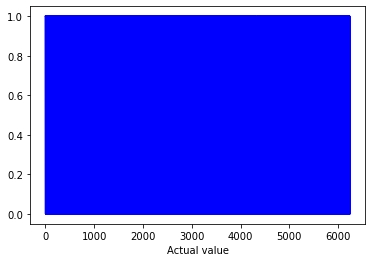

In [ ]:
plt.plot(y_test,color='blue',label='Actual value')

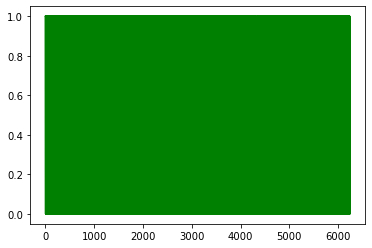

In [ ]:
 plt.plot(y_test_predicted,color='green',label='Predicted value')
 

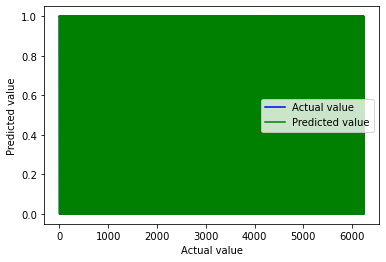

In [ ]:
plt.plot(y_test,color='blue',label='Actual value')
plt.plot(y_test_predicted,color='green',label='Predicted value')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.legend()
plt.show()